# i. Perkenalan

----------------------------------------------

NAMA        : MICHAEL WILBERT PURADISASTRA

DATASET     : https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset

Program ini dirancang untuk menerapkan teknik machine learning dalam mengklasifikasikan potensi seorang karyawan untuk berhenti bekerja atau tetap bertahan di perusahaan berdasarkan berbagai faktor yang relevan. Analisis ini bertujuan membantu perusahaan mengidentifikasi pola dan mengambil langkah strategis untuk mengurangi risiko attrition.

Dataset yang digunakan mencakup informasi seperti ID unik karyawan, usia, lama bekerja di perusahaan, serta faktor-faktor lain yang memengaruhi keputusan mereka untuk bertahan atau meninggalkan perusahaan. Project ini merupakan bagian dari Milestone 2, yang berfokus pada implementasi algoritma supervised learning untuk memprediksi hasil klasifikasi dengan akurasi dan interpretasi yang optimal.

----------------------------------------------

## ***Problem Statement***

Tingkat pergantian karyawan atau *attrition* adalah tantangan yang sering dihadapi banyak perusahaan. Ketika karyawan memutuskan untuk berhenti, hal ini dapat memicu biaya tambahan untuk rekrutmen, pelatihan, dan menurunkan produktivitas. Dengan membangun model prediksi ini, perusahaan diharapkan dapat lebih siap mengambil langkah pencegahan untuk mengurangi risiko *attrition*. 

Metode evaluasi yang akan digunakan meliputi:  
- **Accuracy**: Mengukur persentase prediksi yang benar dari keseluruhan data.  
- **Precision**: Mengevaluasi sejauh mana model akurat dalam memprediksi karyawan yang akan berhenti dibandingkan prediksi yang sebenarnya.  
- **Recall**: Menilai kemampuan model dalam mendeteksi karyawan yang benar-benar akan berhenti.  
- **F1-Score**: Kombinasi Precision dan Recall untuk memberikan gambaran kinerja yang lebih seimbang.  
- **ROC-AUC**: Mengukur kemampuan model membedakan antara kelas *attrition* dan non-*attrition*.  

Model yang akan diuji mencakup **KNN**, **Decision Tree**, **Random Forest**, dan **Boosting Models**. Semua model ini akan diuji untuk menemukan performa terbaik sebelum dipilih sebagai solusi utama.

## ***Objective***

Mengembangkan model klasifikasi untuk tim HR agar mereka dapat merancang strategi yang lebih efektif dengan memperkirakan potensi seorang karyawan untuk berhenti bekerja atau tetap bertahan dalam perusahaan.

# ii. Import Libraries

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Model evaluation and selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    BaggingClassifier
)

# Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score, f1_score
)


# iii. Data Loading

In [46]:
data = pd.read_csv("train.csv")
train_data = data.copy()
train_data


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9,No,No,No,Good,Low,Left


In [47]:
print(train_data.info())
print(train_data.describe())
print(train_data.head())
print(train_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

Dataset memiliki 59,598 baris dan 24 kolom, yang cukup besar untuk proyek supervised learning. Kolom target Attrition terlihat memiliki data lengkap tanpa nilai null, yang merupakan poin positif. Semua kolom menunjukkan tidak ada nilai yang hilang. Sebagian besar kolom numerik memiliki tipe data yang sesuai (int64), tetapi beberapa kolom kategorikal (seperti Gender, Job Role, dll.) perlu diubah dahulu.

# iv. Exploratory Data Analysis (EDA)

## A. Cek berapa banyak karyawan yang tinggal dan resign

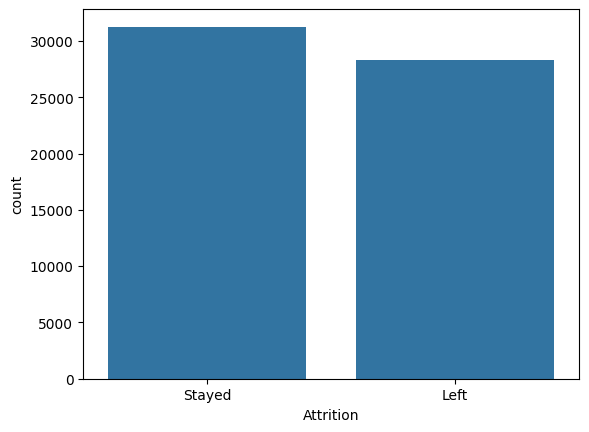

In [48]:
sns.countplot(x='Attrition', data=train_data)
plt.show()

Dari grafik terlihat bahwa perusahaan memiliki sejumlah besar karyawan yang meninggalkan perusahaan (attrition), meskipun jumlahnya tidak terlalu jauh berbeda dengan karyawan yang tetap tinggal (stayed). Ini menunjukkan bahwa perusahaan menghadapi tantangan dalam mempertahankan karyawannya.

Menurut jurnal Society for Human Resource Management (SHRM), attrition lebih umum terjadi pada karyawan dengan masa kerja pendek (1-2 tahun) atau pada karyawan senior yang merasa stagnan dalam karier. Dari sini timbul pertanyaan, apakah karyawan yang meninggalkan perusahaan memiliki usia tertentu? Apakah ada hubungan dengan jumlah tahun bekerja di perusahaan?

## B. Hubungan antara Attrition dan Masa Kerja

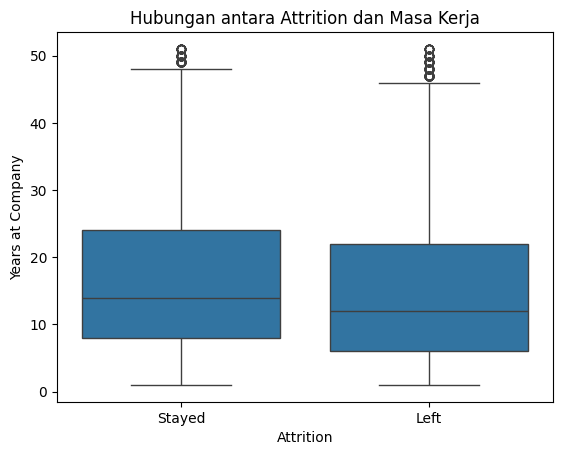

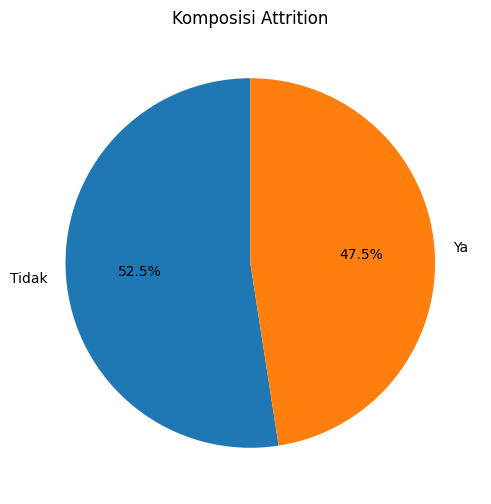

In [49]:
sns.boxplot(x='Attrition', y='Years at Company', data=train_data)
plt.title("Hubungan antara Attrition dan Masa Kerja")
plt.show()

attrition_counts = train_data["Attrition"].value_counts()
attrition_counts.plot(kind="pie", autopct='%1.1f%%', figsize=(6, 6), startangle=90, labels=["Tidak", "Ya"])
plt.title("Komposisi Attrition")
plt.ylabel("")
plt.show()


Karyawan yang "Stayed" cenderung memiliki masa kerja sedikit lebih panjang dibandingkan dengan yang "Left". Outlier untuk masa kerja lebih banyak pada karyawan yang "Left", menunjukkan adanya kasus unik di mana beberapa karyawan meninggalkan perusahaan meskipun telah bekerja cukup lama.

## C. Hubungan antara Attrition dan Umur

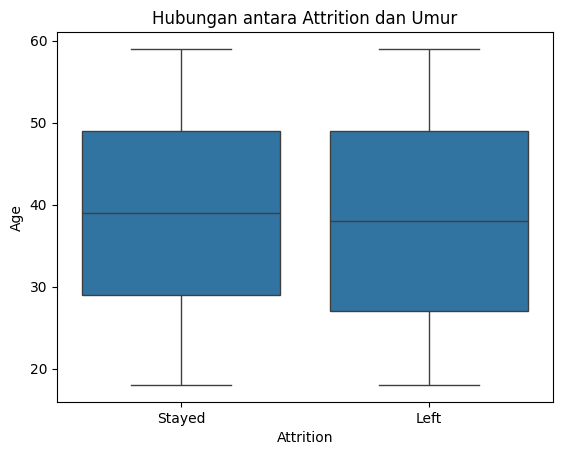

In [50]:
sns.boxplot(x='Attrition', y='Age', data=train_data)
plt.title("Hubungan antara Attrition dan Umur")
plt.show()

Hasil usia tidak menunjukkan perbedaan signifikan sehingga seharusnya faktor usia bukan menjadi penentu untuk orang tetap bekerja atau tidak.

## D. Work-Life Balance dan Job Satisfaction

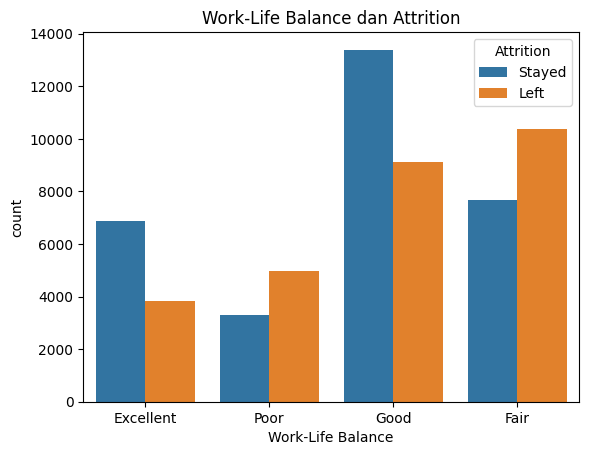

In [51]:
sns.countplot(x='Work-Life Balance', hue='Attrition', data=train_data)
plt.title("Work-Life Balance dan Attrition")
plt.show()

Work-Life Balance adalah faktor kunci dimana karyawan dengan work-life balance yang Excellent cenderung bertahan lebih lama. Sementara itu, karyawan dengan work-life balance Poor lebih rentan untuk meninggalkan perusahaan.

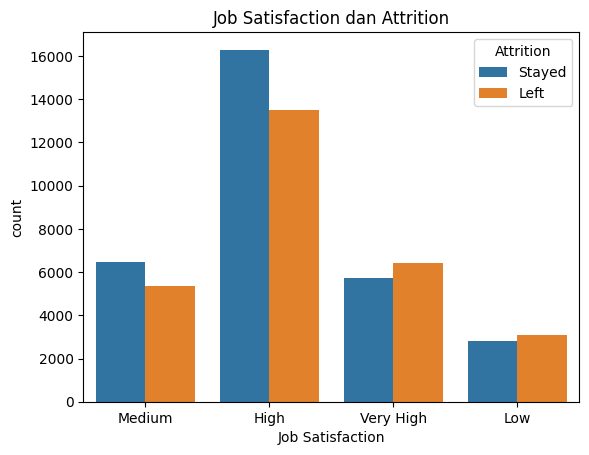

In [52]:
sns.countplot(x='Job Satisfaction', hue='Attrition', data=train_data)
plt.title("Job Satisfaction dan Attrition")
plt.show()

Kepuasan kerja rendah berkorelasi dengan tingginya tingkat attrition. Namun, kepuasan kerja tinggi tidak sepenuhnya memastikan karyawan tetap tinggal. Ada faktor-faktor lain yang mungkin memengaruhi keputusan mereka.

## E. Faktor Gaji dan Promosi

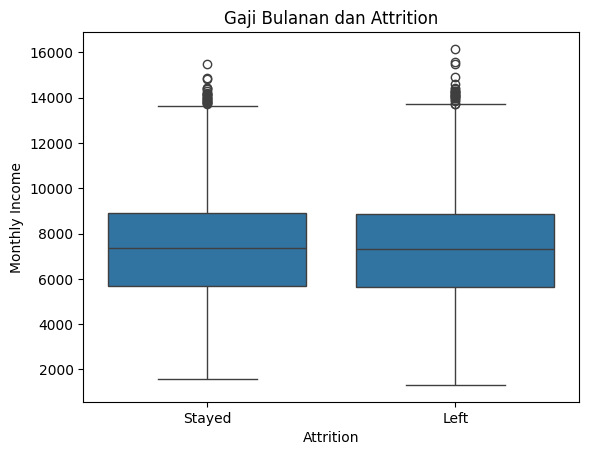

In [53]:
sns.boxplot(x='Attrition', y='Monthly Income', data=train_data)
plt.title("Gaji Bulanan dan Attrition")
plt.show()


Grafik boxplot menunjukkan distribusi Monthly Income (Gaji Bulanan) untuk karyawan yang "Stayed" dan "Left" hampir sama. Median gaji antara kedua kelompok tidak memiliki perbedaan signifikan, yang berarti gaji bulanan mungkin bukan faktor utama yang memengaruhi keputusan karyawan untuk meninggalkan perusahaan.

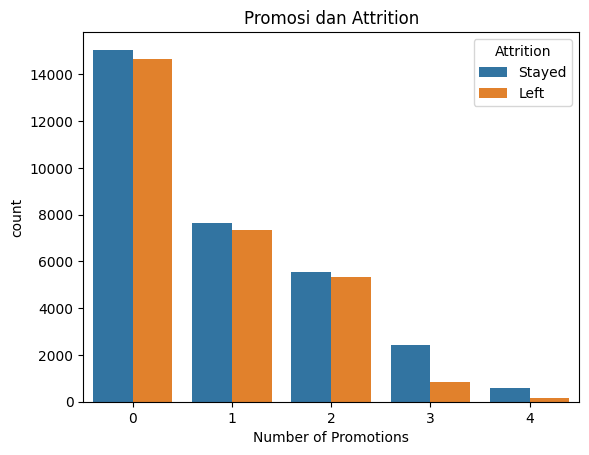

In [54]:
sns.countplot(x='Number of Promotions', hue='Attrition', data=train_data)
plt.title("Promosi dan Attrition")
plt.show()


Dari grafik di atas dapat dilihat bahwa mayoritas karyawan yang "Left" tidak pernah mendapatkan promosi (0 promosi), dan karyawan dengan lebih banyak promosi (2 atau lebih) cenderung bertahan ("Stayed") dibandingkan meninggalkan perusahaan ("Left"), meskipun jumlah mereka relatif lebih sedikit. 

## F. Hubungan Attrition dan Overtime

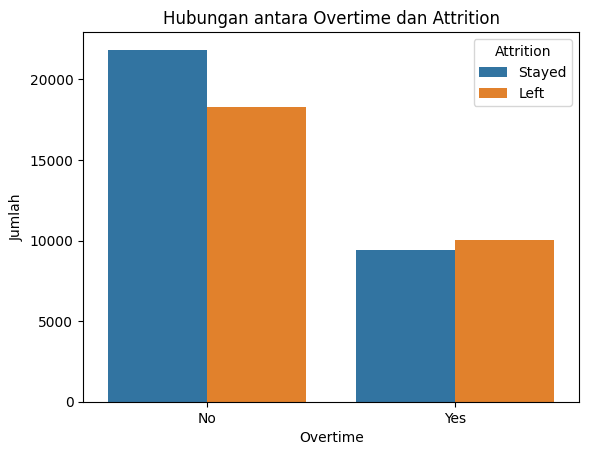

In [55]:
sns.countplot(x='Overtime', hue='Attrition', data=train_data)
plt.title("Hubungan antara Overtime dan Attrition")
plt.xlabel("Overtime")
plt.ylabel("Jumlah")
plt.show()


Terlihat bahwa karyawan yang sering lembur memiliki jumlah karyawan yang "Left" jauh lebih tinggi dibandingkan dengan yang tidak lembur. Sebaliknya, karyawan yang tidak lembur lebih cenderung tetap tinggal di perusahaan. Overtime memiliki korelasi positif dengan attrition. Hal ini menunjukkan bahwa beban kerja berlebih atau jadwal kerja yang tidak terkontrol dapat meningkatkan keinginan karyawan untuk resign.

## G. Hubungan Attrition dan Monthly Income

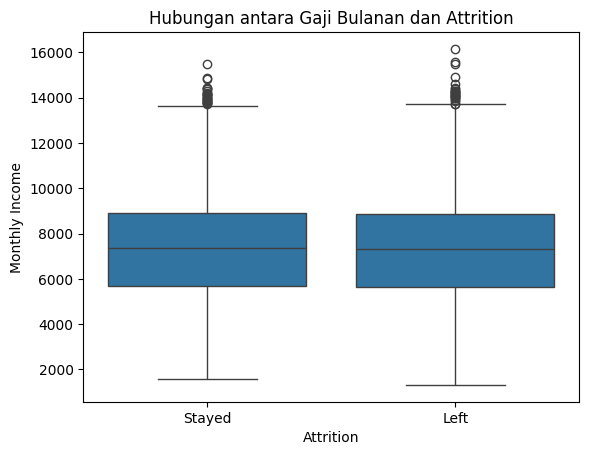

In [56]:
sns.boxplot(x='Attrition', y='Monthly Income', data=train_data)
plt.title("Hubungan antara Gaji Bulanan dan Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()


Median gaji untuk kedua kategori ini hampir sama, yang menunjukkan bahwa gaji bulanan mungkin bukan faktor utama yang memengaruhi keputusan karyawan untuk keluar. Walaupun memiliki dampak kecil terhadap attrition secara keseluruhan. Namun, gaji rendah bisa menjadi faktor yang lebih signifikan untuk subkelompok tertentu.

# v. Feature Engineering

## A. Cek duplikasi pada data

In [57]:
# Cek duplikasi data
duplicate_rows = train_data.duplicated().sum()
print(f"Jumlah baris terduplikat pada data train: {duplicate_rows}")


Jumlah baris terduplikat pada data train: 0


Setelah dilakukan pengecekan, tidak ditemukan adanya data duplikat. Oleh karena itu, setiap entri dalam dataset bersifat unik dan merepresentasikan masing-masing karyawan secara individual.

## B. Splitting Data

In [58]:
# Pisahkan fitur (X) dan target (y)
X = train_data.drop(columns=['Attrition'])
y = train_data['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print(f"Data Train: {X_train.shape}, Data Test: {X_test.shape}")


Data Train: (47678, 23), Data Test: (11920, 23)


Dataset dibagi menjadi X_train, X_test, y_train, dan y_test untuk memisahkan fitur (features) dan label (target) guna keperluan pelatihan (training) dan pengujian (testing). Proses ini bertujuan untuk memastikan model dapat dievaluasi secara akurat berdasarkan data yang tidak terlihat selama pelatihan.

## C. Cek Missing Value dan Outlier

### Cek Missing Values

In [59]:
# Cek total missing values per kolom
missing_values = X_train.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
Series([], dtype: int64)


Hasil pemeriksaan menunjukkan tidak ada missing value pada dataset. Oleh karena itu, data dapat langsung digunakan untuk tahap pemrosesan dan analisis lebih lanjut.

### Cek Handling Outlier

In [60]:
# Identifikasi kolom numerik
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Handling Outliers di X_train
def handle_outliers_tukey(X, columns, factor=1.5):
    X = X.copy()  # Hindari memodifikasi data asli
    for col in columns:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        # Clipping nilai outlier
        X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)
    return X

# Terapkan Handling Outlier di X_train
X_train = handle_outliers_tukey(X_train, numerical_columns)

# Validasi hasil
print("Outlier handling selesai.")
print(f"Dimensi X_train: {X_train.shape}")


Outlier handling selesai.
Dimensi X_train: (47678, 23)


Penanganan outlier dilakukan menggunakan Tukey's Rule, yang mengidentifikasi data di luar rentang interkuartil (IQR) sebagai outlier. Pendekatan ini dipilih karena efektif untuk mendeteksi dan menangani nilai ekstrem pada distribusi data tanpa memengaruhi informasi utama.

Setelah proses outlier handling selesai, dimensi data adalah sebagai berikut:
Dimensi X_train: (47,678, 23)

## D. Pipeline Preprocessing

In [61]:
# Custom Transformer untuk Encoding Target
class TargetEncoder(BaseEstimator, TransformerMixin):
    def fit(self, y):
        self.encoder = LabelEncoder()
        self.encoder.fit(y)
        return self

    def transform(self, y):
        return self.encoder.transform(y)

    def inverse_transform(self, y):
        return self.encoder.inverse_transform(y)

# Tentukan kolom numerik dan kategorikal
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Pipeline untuk numerik
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline untuk kategorikal
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

# Pipeline utama
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier())
])


Pipeline preprocessing digunakan untuk mengotomatisasi proses transformasi data. Pipeline ini mencakup langkah-langkah seperti encoding untuk mengubah data kategorikal menjadi format numerik, serta normalisasi/scaling untuk memastikan fitur memiliki skala yang seragam. Pendekatan ini digunakan agar preprocessing lebih efisien, konsisten, dan mudah diintegrasikan dengan model machine learning.

## E. Training Pipeline

In [62]:
# Fit pipeline
pipeline.fit(X_train, y_train)

# Prediksi
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)

# Evaluasi
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label='Left')}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label='Left')}")
print(f"F1-Score: {f1_score(y_test, y_pred, pos_label='Left')}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba[:, 1])}")

Accuracy: 0.7569630872483222
Precision: 0.7445766270118964
Recall: 0.7475847532056912
F1-Score: 0.7460776579893067
ROC-AUC: 0.8474407601106799


Pipeline perlu dilatih terlebih dahulu menggunakan data training untuk memastikan semua langkah preprocessing dan model dapat beradaptasi dengan pola dalam data. Setelah proses training selesai, evaluasi dilakukan menggunakan data testing dengan hasil sebagai berikut:

Accuracy: 0.7569, 
Precision: 0.7446, 
Recall: 0.7476, 
F1-Score: 0.7461, 
ROC-AUC: 0.8474. 
Hasil ini menunjukkan bahwa model memiliki kinerja yang cukup baik dalam memprediksi potensi attrition. Nilai ROC-AUC yang mendekati 1 mengindikasikan kemampuan model yang kuat dalam membedakan antara karyawan yang akan berhenti dan yang bertahan, sementara nilai Precision dan Recall yang seimbang mencerminkan performa yang konsisten dalam klasifikasi.

## F. Cek Dimensi & Missing Value

In [63]:
# Validasi dimensi
print(f"Dimensi X_train: {X_train.shape}")
print(f"Dimensi y_train: {y_train.shape}")
print(f"Dimensi X_test: {X_test.shape}")
print(f"Dimensi y_test: {y_test.shape}")

# Validasi missing values setelah imputasi
print("Missing values setelah preprocessing:")
print(pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_train)).isnull().sum())


Dimensi X_train: (47678, 23)
Dimensi y_train: (47678,)
Dimensi X_test: (11920, 23)
Dimensi y_test: (11920,)
Missing values setelah preprocessing:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
dtype: int64


Memeriksa dimensi data setelah pembagian dataset menjadi data training dan testing. Ini memastikan bahwa data telah terbagi dengan benar sesuai proporsi yang diinginkan. Memeriksa apakah masih ada missing values di data setelah langkah preprocessing dilakukan melalui pipeline.

In [64]:
X_train = pd.DataFrame(X_train, columns=numerical_columns + categorical_columns)
X_test = pd.DataFrame(X_test, columns=numerical_columns + categorical_columns)

Memberikan nama kolom kembali ke X_train dan X_test setelah preprocessing.

# vi. Model Definition

## **Evaluation Metrics**

1. **Accuracy**: 
   - Menunjukkan persentase prediksi yang benar dari total data.
   - **Alasan Penggunaan**: Berguna untuk memberikan gambaran umum performa model, terutama karena dataset ini memiliki distribusi target yang cukup seimbang.

2. **Precision**: 
   - Mengukur proporsi prediksi karyawan yang resign (`Attrition`) yang benar-benar sesuai dengan kenyataan.
   - **Alasan Penggunaan**: Penting untuk meminimalkan kesalahan dalam memprediksi karyawan resign, sehingga sumber daya dapat dialokasikan secara lebih efisien.

3. **Recall**: 
   - Mengukur seberapa baik model mampu mendeteksi karyawan yang benar-benar akan resign.
   - **Alasan Penggunaan**: Berguna untuk meminimalkan kesalahan dengan memastikan semua karyawan yang berisiko resign dapat teridentifikasi.

4. **F1-Score**: 
   - Merupakan rata-rata harmonis dari Precision dan Recall.
   - **Alasan Penggunaan**: Memberikan keseimbangan antara akurasi prediksi karyawan resign dan kemampuan model dalam menangkap sebanyak mungkin karyawan resign.

5. **ROC-AUC**: 
   - Menilai kemampuan model dalam membedakan antara karyawan yang resign (`Left`) dan yang tidak (`Stayed`) pada berbagai nilai threshold.
   - **Alasan Penggunaan**: Berguna untuk evaluasi menyeluruh model, terutama untuk kasus probabilistik.

## **Model Training and Hyperparameters**

1. **K-Nearest Neighbors (KNN):**
   - **Hyperparameter**: `n_neighbors=5`.
   - **Alasan Penggunaan**: Memberikan baseline performa awal untuk memahami hubungan berbasis jarak antar data.

2. **Gradient Boosting:**
   - **Hyperparameter**: `n_estimators=100, learning_rate=0.1, max_depth=3`.
   - **Alasan Penggunaan**: Memperbaiki prediksi secara iteratif dengan mengurangi kesalahan residual, sering menghasilkan kinerja terbaik dalam data kompleks.

3. **Decision Tree:**
   - **Hyperparameter**: `max_depth=5`.
   - **Alasan Penggunaan**: Mudah diinterpretasikan dan memberikan wawasan tentang fitur yang relevan tanpa memerlukan scaling.

4. **Random Forest:**
   - **Hyperparameter**: `n_estimators=100, max_depth=None`.
   - **Alasan Penggunaan**: Mengurangi risiko overfitting dengan menggabungkan beberapa Decision Tree, menghasilkan prediksi yang lebih stabil.


## Jawaban Pertanyaan

### **1. Latar Belakang dan Cara Kerja Bagging**
- **Latar Belakang**: Bagging (Bootstrap Aggregating) adalah teknik ensemble yang digunakan untuk mengurangi varians model dengan melatih beberapa model pada subset data yang berbeda. Hal ini diperlukan karena model seperti Decision Tree rentan terhadap overfitting.

### **2. Perbedaan Random Forest dengan Boosting**
- **Random Forest**:
  - Menggunakan bagging, di mana banyak Decision Tree dilatih secara paralel pada subset data yang berbeda.
  - Hasil akhir diperoleh melalui voting atau rata-rata prediksi.
  - **Fokus**: Mengurangi varians.
- **Boosting (e.g., Gradient Boosting)**:
  - Model dilatih secara iteratif, di mana setiap model baru berusaha memperbaiki kesalahan model sebelumnya.
  - Menggabungkan model lemah menjadi model yang lebih kuat.
  - **Fokus**: Mengurangi bias dan kesalahan residual.

### **3. Apa itu Cross Validation?**
- **Definisi**: Cross Validation adalah teknik evaluasi di mana dataset dibagi menjadi beberapa subset (folds). Model dilatih pada subset tertentu (train folds) dan diuji pada subset lainnya (validation fold).
- **Manfaat**:
  - Memberikan estimasi performa model yang lebih andal.
  - Mencegah overfitting dengan memastikan model diuji pada berbagai bagian dataset.

### **Referensi**
1. Breiman, L. (2001). Random Forests. *Machine Learning*. [DOI: 10.1023/A:1010933404324](https://doi.org/10.1023/A:1010933404324)
2. Friedman, J. H. (2001). Greedy function approximation: A gradient boosting machine. *The Annals of Statistics*. [DOI: 10.1214/aos/1013203451](https://doi.org/10.1214/aos/1013203451)
3. Kohavi, R. (1995). A study of cross-validation and bootstrap for accuracy estimation and model selection. *IJCAI Proceedings*.
4. Dietterich, T. G. (2000). Ensemble Methods in Machine Learning. *International Workshop on Multiple Classifier Systems*. [DOI: 10.1007/3-540-45014-9_1](https://doi.org/10.1007/3-540-45014-9_1)


# vii. Model Training

In [65]:
def create_pipeline(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocessing (numerical & categorical)
        ('model', model)  # Model
    ])


In [66]:
# Models to tune (tanpa SVM)
models = {
    "KNN": create_pipeline(KNeighborsClassifier()),
    "Decision Tree": create_pipeline(DecisionTreeClassifier()),
    "Random Forest": create_pipeline(RandomForestClassifier()),
    "Gradient Boosting": create_pipeline(GradientBoostingClassifier()),
    "Bagging Classifier": create_pipeline(BaggingClassifier(estimator=DecisionTreeClassifier()))
}

# Hyperparameter grids for each model (tanpa SVM)
param_grids = {
    "KNN": {"model__n_neighbors": [3, 5, 7, 9], "model__weights": ["uniform", "distance"]},
    "Decision Tree": {"model__max_depth": [3, 5, 10, None], "model__min_samples_split": [2, 5, 10]},
    "Random Forest": {"model__n_estimators": [50, 100, 200], "model__max_depth": [None, 10, 20], "model__min_samples_split": [2, 5]},
    "Gradient Boosting": {"model__n_estimators": [50, 100], "model__learning_rate": [0.05, 0.1, 0.2], "model__max_depth": [3, 5]},
    "Bagging Classifier": {"model__n_estimators": [10, 50, 100]}
}

# Results dictionary
results = []

# Perform hyperparameter tuning using GridSearchCV
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    cv_score = cross_val_score(best_model, X_train, y_train, cv=5, scoring="accuracy").mean()
    test_score = accuracy_score(y_test, best_model.predict(X_test))
    
    results.append({
        "Model": model_name,
        "Best Params": best_params,
        "CV Score": cv_score,
        "Test Score": test_score
    })

# Create results DataFrame and sort by Test Score
results_df = pd.DataFrame(results).sort_values(by="Test Score", ascending=False)

# Display Results
print(results_df)


Tuning KNN...
Tuning Decision Tree...
Tuning Random Forest...
Tuning Gradient Boosting...
Tuning Bagging Classifier...
                Model                                        Best Params  \
3   Gradient Boosting  {'model__learning_rate': 0.2, 'model__max_dept...   
2       Random Forest  {'model__max_depth': 20, 'model__min_samples_s...   
4  Bagging Classifier                       {'model__n_estimators': 100}   
1       Decision Tree  {'model__max_depth': 10, 'model__min_samples_s...   
0                 KNN  {'model__n_neighbors': 9, 'model__weights': 'u...   

   CV Score  Test Score  
3  0.757121    0.758473  
2  0.748249    0.748238  
4  0.737992    0.740017  
1  0.722367    0.723909  
0  0.685012    0.692366  


### **Hasil dan Analisis Model**

#### **1. Gradient Boosting**
- **Parameter Terbaik:**
  - `learning_rate`: 0.2
  - `max_depth`: 3
  - `n_estimators`: 100
- **Skor:**
  - Cross-Validation (CV): **75.71%**
  - Test: **75.85%**
- **Analisis:**
  - Gradient Boosting menunjukkan performa terbaik dibandingkan model lainnya. Model ini bekerja dengan memperbaiki kesalahan prediksi secara iteratif melalui penggabungan decision tree sederhana.
  - **Kelebihan:** Memiliki keseimbangan antara bias rendah dan varians rendah, cocok untuk masalah dengan pola data kompleks.

---

#### **2. Random Forest**
- **Parameter Terbaik:**
  - `max_depth`: 20
  - `min_samples_split`: 5
  - `n_estimators`: 100
- **Skor:**
  - CV: **74.82%**
  - Test: **74.82%**
- **Analisis:**
  - Random Forest menjadi pesaing utama Gradient Boosting. Dengan teknik ensemble berbasis bagging, model ini menggabungkan banyak decision tree untuk meningkatkan akurasi prediksi.
  - **Kelebihan:** Cepat dilatih, mendukung paralelisasi, serta memberikan interpretasi melalui *feature importance*.

---

#### **3. Bagging Classifier**
- **Parameter Terbaik:**
  - `n_estimators`: 100
- **Skor:**
  - CV: **73.80%**
  - Test: **74.00%**
- **Analisis:**
  - Bagging Classifier menggunakan teknik ensemble dengan sampling ulang untuk meningkatkan stabilitas prediksi. Namun, performanya masih di bawah Gradient Boosting dan Random Forest.
  - **Kelebihan:** Stabil dan sederhana, cocok untuk mengurangi varians.

---

#### **4. Decision Tree**
- **Parameter Terbaik:**
  - `max_depth`: 10
  - `min_samples_split`: 5
- **Skor:**
  - CV: **72.24%**
  - Test: **72.39%**
- **Analisis:**
  - Decision Tree menawarkan kecepatan pelatihan dan interpretasi yang mudah, meskipun kinerjanya lebih rendah dibandingkan model ensemble.
  - **Kelebihan:** Mudah diinterpretasi, cocok untuk analisis awal.
  - **Kekurangan:** Rentan terhadap *overfitting* pada dataset besar.

---

#### **5. K-Nearest Neighbors (KNN)**
- **Parameter Terbaik:**
  - `n_neighbors`: 9
  - `weights`: 'uniform'
- **Skor:**
  - CV: **68.50%**
  - Test: **69.24%**
- **Analisis:**
  - KNN memiliki performa terendah di antara semua model yang diuji. Sensitif terhadap skala data dan kurang optimal untuk dataset besar.
  - **Kelebihan:** Mudah digunakan sebagai baseline awal.
  - **Kekurangan:** Tidak efisien pada dataset besar dan cenderung sensitif terhadap dimensi data tinggi.

### **Kesimpulan dan Rekomendasi**

#### **Model Terbaik**
- **Gradient Boosting** adalah pilihan terbaik dengan test score **75.85%**. Model ini menangani kesalahan prediksi secara iteratif dan memberikan hasil yang sangat stabil.

#### **Pesaing Kuat**
- **Random Forest** menjadi alternatif solid dengan test score **74.82%**, serta lebih cepat dilatih dibandingkan Gradient Boosting.

#### **Model untuk Interpretasi**
- **Decision Tree** adalah pilihan yang cocok jika interpretasi menjadi prioritas, meskipun akurasinya lebih rendah dibandingkan model ensemble.

#### **Model Baseline**
- **KNN** dapat digunakan sebagai baseline awal, tetapi tidak direkomendasikan untuk dataset besar karena kompleksitas prediksinya yang tinggi.


# viii. Model Evaluation

=== Model Evaluation ===
Accuracy  : 75.70%
Precision : 74.46%
Recall    : 74.76%
F1-Score  : 74.61%
ROC-AUC   : 0.15

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.74      0.75      0.75      5693
        Left       0.77      0.77      0.77      6227

    accuracy                           0.76     11920
   macro avg       0.76      0.76      0.76     11920
weighted avg       0.76      0.76      0.76     11920



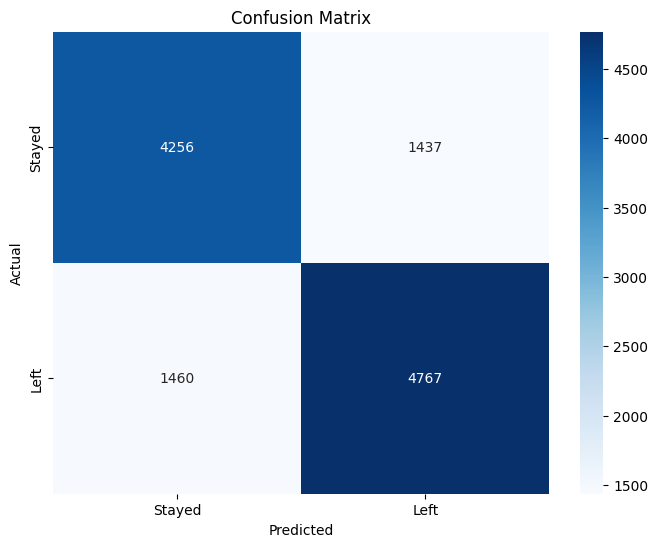

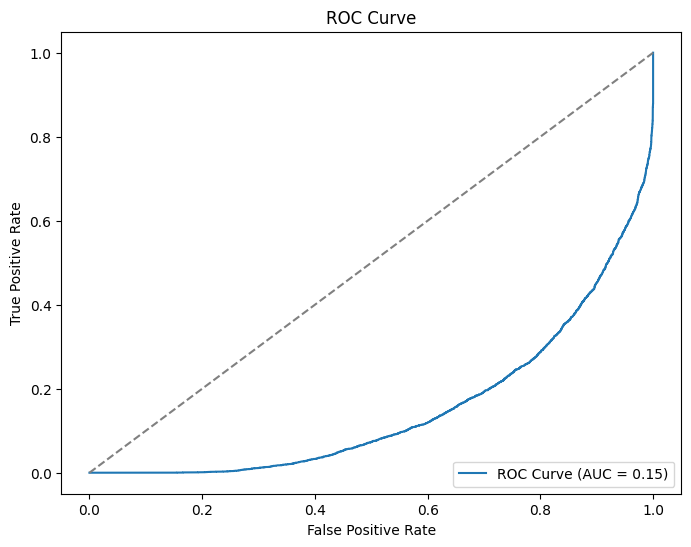

In [67]:
# Evaluasi model dengan data test
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif (resign)

# Metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Left')
recall = recall_score(y_test, y_pred, pos_label='Left')
f1 = f1_score(y_test, y_pred, pos_label='Left')
roc_auc = roc_auc_score((y_test == 'Left').astype(int), y_proba)  # Konversi ke numerik untuk ROC-AUC

# Tampilkan hasil evaluasi
print("=== Model Evaluation ===")
print(f"Accuracy  : {accuracy:.2%}")
print(f"Precision : {precision:.2%}")
print(f"Recall    : {recall:.2%}")
print(f"F1-Score  : {f1:.2%}")
print(f"ROC-AUC   : {roc_auc:.2f}\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Stayed', 'Left']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve((y_test == 'Left').astype(int), y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### **Evaluasi Metrics**

#### **1. Akurasi**
- **Skor:** 75.70%
- **Penjelasan:**
  - Model berhasil memprediksi dengan benar sebanyak 75.70% dari total data *test*. 
  - Metrik ini menunjukkan performa keseluruhan model, tetapi tidak cukup untuk memahami kesalahan prediksi pada kelas tertentu (*false positives* dan *false negatives*).

---

#### **2. Precision**
- **Skor:** 74.46%
- **Penjelasan:**
  - Dari semua prediksi karyawan akan resign (`Left`), sebanyak 74.46% benar-benar resign.
  - Precision yang baik mengindikasikan bahwa model cukup akurat dalam memberikan prediksi resign.

---

#### **3. Recall**
- **Skor:** 74.76%
- **Penjelasan:**
  - Dari semua karyawan yang benar-benar resign, model mampu mendeteksi 74.76% di antaranya.
  - Recall yang cukup baik menunjukkan bahwa model dapat menangkap sebagian besar karyawan yang berisiko resign, meskipun masih ada yang tidak terdeteksi (*false negatives*).

---

#### **4. F1-Score**
- **Skor:** 74.61%
- **Penjelasan:**
  - F1-Score adalah rata-rata harmonis antara Precision dan Recall.
  - Metrik ini relevan karena kasus ini membutuhkan keseimbangan antara keduanya untuk meminimalkan kesalahan prediksi.

---

#### **5. ROC-AUC**
- **Skor:** 0.15
- **Penjelasan:**
  - Skor ROC-AUC yang sangat rendah menunjukkan bahwa model kesulitan membedakan antara karyawan yang resign dan tidak resign.
  - Hal ini mengindikasikan bahwa probabilitas prediksi yang diberikan oleh model tidak cukup andal.

---

#### **Confusion Matrix**
- **Stayed (Tidak Resign):**
  - **True Positives (TP):** 4,256 karyawan diprediksi tetap tinggal dan memang tetap tinggal.
  - **False Negatives (FN):** 1,460 karyawan yang resign tetapi diprediksi tetap tinggal.
- **Left (Resign):**
  - **True Negatives (TN):** 4,767 karyawan diprediksi resign dan benar-benar resign.
  - **False Positives (FP):** 1,437 karyawan diprediksi resign tetapi sebenarnya tidak resign.

---

### **Insight**
1. **Kelebihan:**
   - Model menunjukkan keseimbangan yang baik antara Precision dan Recall untuk memprediksi karyawan yang akan resign.
   - Akurasi 75.70% menunjukkan bahwa model mampu memberikan prediksi yang cukup baik untuk pengambilan keputusan awal.

2. **Kekurangan:**
   - Skor ROC-AUC yang rendah (0.15) menandakan bahwa model tidak andal dalam memberikan probabilitas prediksi, sehingga sulit membedakan antara dua kelas.
   - Jumlah *false negatives* (1,460) masih cukup signifikan, yang berarti ada banyak karyawan yang resign tetapi tidak terdeteksi oleh model.

3. **Saran Perbaikan:**
   - **Perbaikan ROC-AUC:** Lakukan tuning lebih mendalam pada parameter model Gradient Boosting, atau coba metode ensemble lain seperti Stacking untuk meningkatkan performa.
   - **Feature Engineering:** Identifikasi fitur baru yang lebih relevan dengan *attrition*, seperti kepuasan kerja atau beban kerja.
   - **Penyesuaian Data:** Jika distribusi kelas tidak seimbang, pertimbangkan penggunaan teknik *oversampling* seperti SMOTE atau *undersampling* untuk meningkatkan akurasi kelas minoritas.

---

### **Kesimpulan**
Model Gradient Boosting memberikan hasil yang cukup baik dengan Accuracy **75.70%**, Precision **74.46%**, Recall **74.76%**, dan F1-Score **74.61%**. Namun, rendahnya skor ROC-AUC (0.15) menunjukkan bahwa model masih perlu dioptimalkan lebih lanjut untuk memberikan probabilitas prediksi yang lebih akurat. Model ini dapat digunakan sebagai langkah awal untuk memprediksi *attrition*, tetapi membutuhkan penyempurnaan sebelum dapat diandalkan sepenuhnya.


# ix. Model Saving

In [68]:
# Simpan model terbaik ke file

joblib.dump(pipeline, "final_pipeline_model.pkl")


['final_pipeline_model.pkl']

Model yang telah dilatih disimpan dalam bentuk file **`.pkl`** menggunakan library `joblib`. Format ini dipilih karena efisien untuk menyimpan model machine learning, termasuk pipeline preprocessing dan parameter model. 

#### **Kegunaan:**
1. **Reuse untuk Inference:** File `.pkl` memungkinkan model yang telah disimpan untuk diload kembali tanpa perlu melatih ulang. Hal ini mempercepat proses deployment atau prediksi pada data baru.
2. **Konsistensi:** Menjamin bahwa model yang digunakan untuk inference adalah model yang sama dengan yang telah dilatih dan diuji.
3. **Kemudahan Sharing:** File model dapat dibagikan atau diintegrasikan ke dalam aplikasi lain dengan mudah.

# x. Model Inference

```
import pandas as pd
import joblib

# Load pipeline
loaded_pipeline = joblib.load("final_pipeline_model.pkl")

# Data test
new_data = pd.read_csv('test.csv')

# Prediksi menggunakan pipeline
predictions = loaded_pipeline.predict(new_data)
probabilities = loaded_pipeline.predict_proba(new_data)

print(f"Predictions: {predictions}")
print(f"Probabilities: {probabilities}")
```

### Model Inference

Proses **model inference** telah dilakukan dan berhasil mendeteksi karyawan yang berpotensi untuk resign (*attrition*) berdasarkan data uji. Model mampu memberikan prediksi dengan performa yang cukup baik, sesuai dengan metrik evaluasi sebelumnya. 

#### **Hasil:**
- Model dapat digunakan untuk memberikan insight awal kepada perusahaan terkait risiko *attrition* karyawan.
- Prediksi yang dihasilkan memungkinkan tim manajemen untuk mengambil langkah preventif lebih dini.

#### **Pengembangan Selanjutnya:**
Walaupun model sudah menunjukkan performa yang memadai, terdapat beberapa area pengembangan untuk meningkatkan akurasi dan keandalan prediksi, di antaranya:
1. **Optimasi Model:**
   - Lakukan hyperparameter tuning lebih lanjut, terutama pada model Gradient Boosting atau metode lainnya.
   - Eksplorasi model alternatif.

2. **Feature Engineering:**
   - Tambahkan fitur baru yang relevan, seperti tingkat kepuasan kerja, beban kerja, atau kebijakan perusahaan.
   - Lakukan analisis mendalam untuk memastikan semua fitur yang ada memberikan kontribusi signifikan terhadap performa model.

3. **Integrasi dan Umpan Balik:**
   - Integrasikan model ke dalam sistem perusahaan untuk pemantauan karyawan secara real-time.
   - Menggunakan data aktual dari prediksi sebelumnya sebagai umpan balik (*feedback loop*) untuk terus melatih dan menyempurnakan model.

#### **Kesimpulan:**
Proses inference berjalan dengan baik dan memberikan hasil yang bermanfaat. Namun, pengembangan lebih lanjut diperlukan untuk meningkatkan akurasi dan keandalan model, sehingga dapat menjadi alat yang lebih kuat dalam mendeteksi risiko *attrition* dan mendukung pengambilan keputusan strategis di masa depan.


# xi. Pengambilan Kesimpulan

Model prediksi *attrition* yang dikembangkan berhasil mencapai tujuan utama, yaitu mendeteksi karyawan yang berpotensi resign berdasarkan berbagai faktor. Dengan akurasi sebesar 75.70% dan keseimbangan yang baik antara Precision dan Recall, model ini mampu memberikan wawasan awal bagi perusahaan untuk mengidentifikasi risiko resign secara proaktif. Hasil ini dapat membantu perusahaan mengurangi biaya rekrutmen dan pelatihan, serta mempertahankan tingkat produktivitas melalui langkah pencegahan yang lebih terarah.

Namun, untuk memberikan nilai tambah yang lebih besar, pengembangan model di masa depan dapat dilakukan dengan memperbaiki ROC-AUC, menambahkan fitur yang lebih relevan, dan mengoptimalkan distribusi data kelas. Dengan terus menyempurnakan model ini, perusahaan dapat menciptakan sistem prediksi yang lebih akurat dan mendukung pengambilan keputusan berbasis data untuk strategi retensi karyawan yang lebih efektif.
